In [1]:
import pandas as pd

DATA = '/kaggle/input/aramco-stock-price2019-2024/aramco.csv'
df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['Date'], date_format='%b %d, %Y')
df['Volume'] = df['Volume'].apply(func=lambda x: str(x).replace('-', '0').replace(',', '')).astype(float)
df['year'] = df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year
0,2025-01-01,28.05,28.10,28.00,28.05,28.05,3345060.0,2025
1,2024-12-31,28.00,28.15,27.95,28.05,28.05,8325694.0,2024
2,2024-12-30,27.85,28.00,27.80,27.90,27.90,14128315.0,2024
3,2024-12-29,28.00,28.10,27.80,27.85,27.85,16343880.0,2024
4,2024-12-26,28.10,28.15,28.00,28.00,28.00,3841631.0,2024


Let's look at the price/volume correlations.

In [2]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.996848,0.996973,0.994557,0.912871,0.000210
High,0.996848,1.000000,0.995126,0.997407,0.911990,0.014839
Low,0.996973,0.995126,1.000000,0.996972,0.917128,-0.015814
Close,0.994557,0.997407,0.996972,1.000000,0.915434,-0.001423
Adj Close,0.912871,0.911990,0.917128,0.915434,1.000000,0.017229
Volume,0.000210,0.014839,-0.015814,-0.001423,0.017229,1.000000


What do the correlations tell us?
* None of our prices are perfectly correlated, which tells us that none of our prices are redundant
* Prices and volumes are essentially uncorrelated. This is unusual, and it may be interesting to see what that looks like

Let's look at the price time series. The adjusted close is probably the most informative single series, so let's look at that.

<Axes: xlabel='Date', ylabel='Adj Close'>

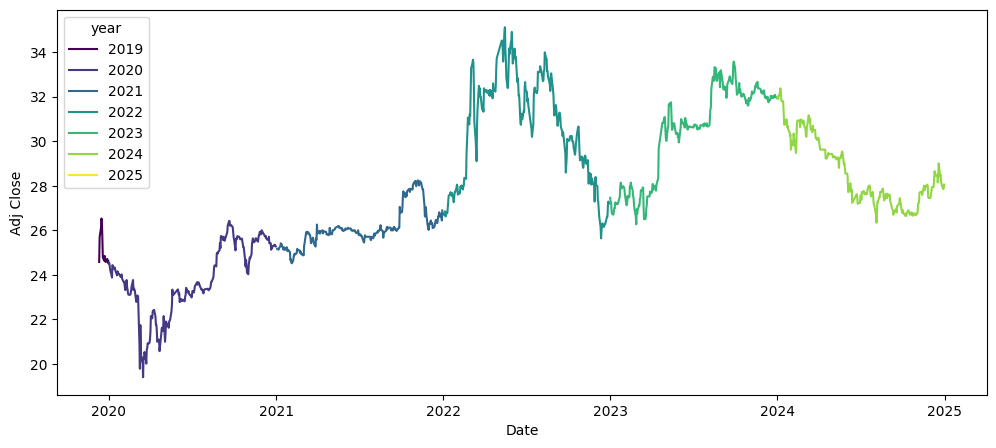

In [3]:
import matplotlib.pyplot as plt
from seaborn import lineplot
from warnings import filterwarnings

PALETTE='viridis'
FIGSIZE=(12, 5)

filterwarnings(action='ignore', category=FutureWarning)
plt.figure(figsize=FIGSIZE)
lineplot(palette=PALETTE, data=df, x='Date', y='Adj Close', hue='year')

What do we see? We see that over the period of interest the stock has traded mostly in a trading range of 27 give or take 7. If we bought at exactly the right time and sold at exactly the right time we could have made a 70pct return, but if we bought and held we would have made essentially nothing. Less than that after inflation and any borrowing costs.

What does volume look like over the same period? We want to use a scatter plot here, because volume, unlike price, does not exhibit serial correlation.

<Axes: xlabel='Date', ylabel='Volume'>

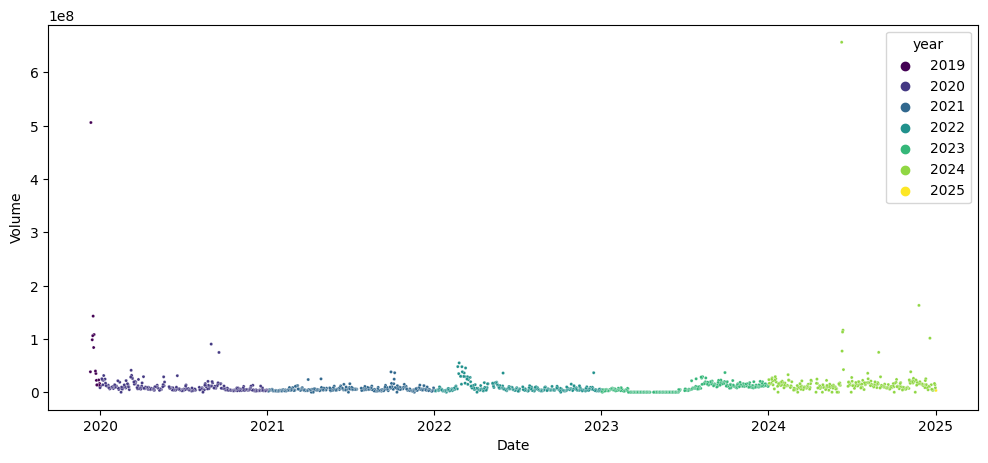

In [4]:
from seaborn import scatterplot
plt.figure(figsize=FIGSIZE)
scatterplot(palette=PALETTE, s=5, data=df, x='Date', y='Volume', hue='year')

The volume varies so wildly that outliers make it look mostly like a flat line. Let's look at the log of the volume instead.

<Axes: xlabel='Date', ylabel='Volume'>

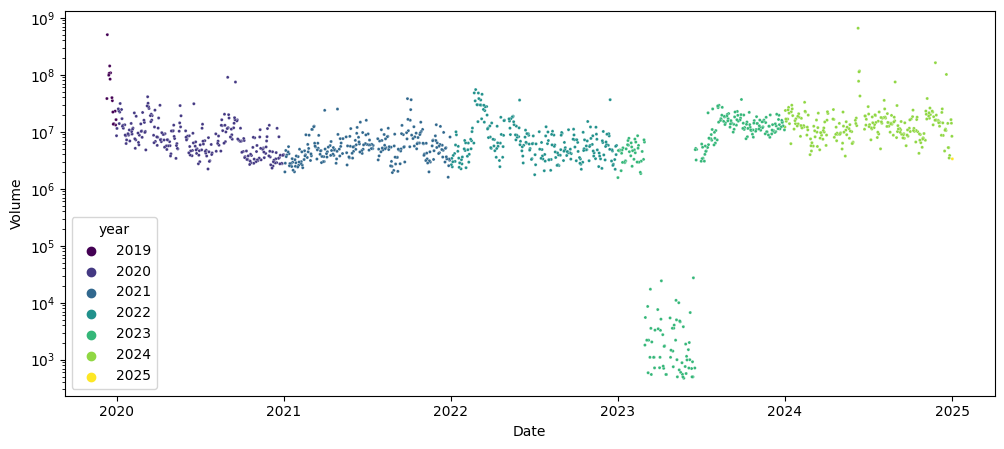

In [5]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette=PALETTE, s=5, data=df, x='Date', y='Volume', hue='year')

What do we see? We see that for the most part volume is in the 1e7 to 1e8 range every day without much variation, except for a period in 2023 where volume is so low it looks like dirty data.

What do we see if we plot the price and volume together?

<Axes: xlabel='Adj Close', ylabel='Volume'>

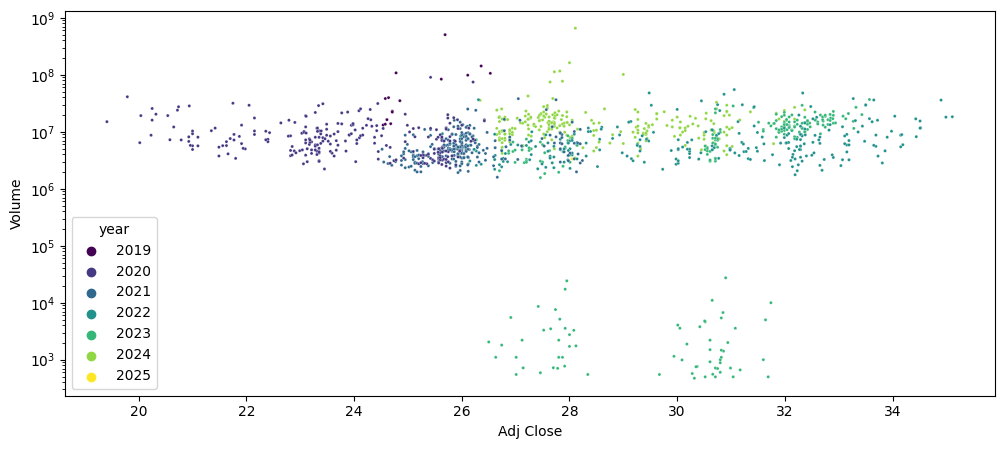

In [6]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette=PALETTE, s=5, data=df, x='Adj Close', y='Volume', hue='year')

What do we see?
* Again we see our oddly low volume stands out
* Because prices trade in a range we don't really see early years on one end and later years on the other.
But otherwise we see what we might expect from two variables that are essentially uncorrelated.